In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#### Which genres are most successful (profitable)?

In [2]:
df = pd.read_json('movies/data/wikidata-movies.json.gz', orient='records', lines=True)
df2 = pd.read_json('movies/data/wikidata-movies2.json.gz', orient='records', lines=True)
genres = pd.read_json('movies/data/genres.json.gz', orient='records', lines=True)

In [3]:
df = df[pd.notnull(df['made_profit'])]

In [4]:
#df['genre'] = df['genre'].str[0]
#genres.columns = ['genre_label', 'genre']

In [5]:
#merged = pd.merge(df, genres, on="genre")

In [6]:
df_stack = df['genre'].apply(pd.Series).stack().reset_index(level=1, drop=True).to_frame()
df_stack.columns = ['wikidata_id']

In [7]:
df_genre = df_stack.reset_index().merge(genres, how="left", on="wikidata_id").set_index('index')

In [8]:
df_genre = pd.merge(df_genre, df, left_index=True, right_index=True).reset_index()

In [9]:
genres['profit'] = genres['genre_label'].apply(lambda x: df_genre[(df_genre['genre_label'] == x) & (df_genre['made_profit'] == True)].shape[0])
genres['noprofit'] = genres['genre_label'].apply(lambda x: df_genre[(df_genre['genre_label'] == x) & (df_genre['made_profit'] == False)].shape[0])

In [10]:
df_genre[(df_genre['country_of_origin'] == 'Q29') & (df_genre['made_profit'] == True)].shape[0]

7

In [11]:
df_genre = genres.sort_values(by='profit', ascending=False)
df_genre = df_genre[(df_genre['profit'] != 0) & (df_genre['noprofit'] != 0)]

In [12]:
# profit_percent = profit/total
df_genre['profit_percent'] = df_genre['profit'] / (df_genre['profit'] + df_genre['noprofit'])

In [23]:
df_genre.sort_values(by='profit_percent', ascending=False)

,genre_label,wikidata_id,profit,noprofit,profit_percent
1872,superhero film,Q1535153,30,1,0.967742
3323,comedy-drama,Q859369,49,2,0.960784
4544,traditionally animated film,Q28968511,19,1,0.950000
3999,neo-noir,Q2421031,17,1,0.944444
3666,LGBT-related film,Q20442589,30,2,0.937500
2782,science fiction film,Q471839,130,12,0.915493
118,speculative fiction film,Q2973181,32,3,0.914286
3473,historical film,Q17013749,10,1,0.909091
1162,mystery film,Q1200678,37,4,0.902439
3784,romantic comedy,Q860626,53,6,0.898305


In [14]:
contingency = np.vstack([df_genre['profit'], df_genre['noprofit']])

In [15]:
chi2, p, dof, expected = stats.chi2_contingency(contingency)

In [16]:
p

0.008127575360670712

In [17]:
#df2 = df2[pd.notnull(df2['nbox'])]

ValueError: unrecognized kwargs: ['ymin']

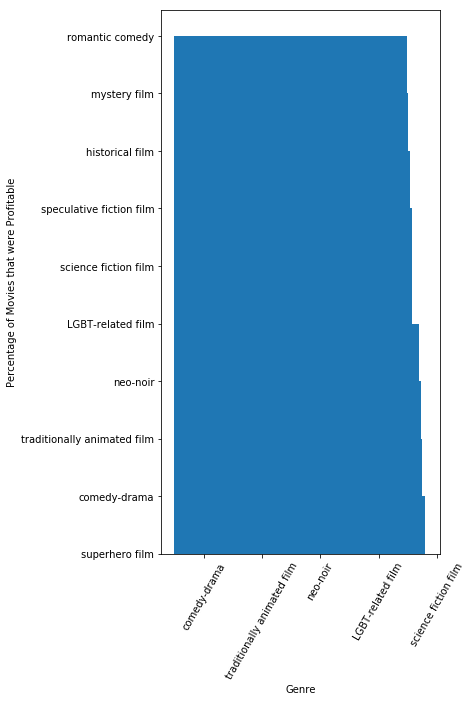

In [84]:
#draw plt
fig, ax = plt.subplots(figsize=(10, 5))
df_genre = df_genre.sort_values(by='profit_percent', ascending=False)
ax.bar( df_genre['genre_label'][:10], df_genre['profit_percent'][:10])
plt.xlabel = 'Percentage of Films that were Profitable'
xticks = ax.get_xticks()
ax.set_xticklabels(df_genre['genre_label'][:10], rotation=60)
ax.set(xlabel='Genre', ylabel='Percentage of Movies that were Profitable')
plt.ylim(ymin=0.9)
#plt.yscale("log")
for i, v in enumerate(df_genre['profit_percent'][:10]):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
    
plt.tight_layout()
plt.savefig('images/genre-profit.png', dpi=300)